# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

In [7]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [8]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [9]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,201276,201503,201557,201750,201949,202026,202108,202199,202347,202509
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,332645,332673,332701,332719,332739,332754,332772,332776,332816,332847
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,270757,270766,270768,270769,270771,270771,270783,270788,270800,270810
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46366,46366,46449,46449,46449,46449,46449,46449,46449,46535
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,702804,702804,702804,702804,702804,702804,702804,703014,703014,703014
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333644,333644,333644,333644,333644,333644,333644,333644,333644,333644


#  Global Analysis

In [10]:
confirmed_df.info(verbose=False)
deaths_df.info(verbose=False)
recoveries_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1013 entries, Province/State to 10/26/22
dtypes: float64(2), int64(1009), object(2)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1013 entries, Province/State to 10/26/22
dtypes: float64(2), int64(1009), object(2)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1013 entries, Province/State to 10/26/22
dtypes: float64(2), int64(1009), object(2)
memory usage: 2.1+ MB


## Solution 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
confirm = confirmed_df.loc[:,'8/4/21'].sum()
deaths=deaths_df.loc[:,'8/4/21'].sum()
recoveries=recoveries_df.loc[:,'8/4/21'].sum()
#  The number of total cases, 
print("Total confirmed cases: ", confirm)
#  The number of  total deaths until now.
print("Total death cases: ", deaths)
#  The number of total recovered until now.
print("Total recoveries cases: ",recoveries )
#  The number of total active until now.
total_active = confirm-(deaths+recoveries)
print("Total active cases: ", total_active)
#total_confirmed_daily = confirmed_df.iloc[:,4:].sum()
total_cases =total_confirmed_daily.values
#total_cases
#total_deaths_daily = deaths_df.iloc[:,4:].sum()
total_deaths =total_deaths_daily.values
#total_deaths
#total_recovery_daily = recoveries_df.iloc[:,4:].sum()
total_recoveries =total_recoveries_daily.values
#total_recoveries
total_active = total_cases -(total_deaths+total_recoveries)
#total_active
#adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])
adjusted_dates =list()
for x in range(len(dates)):
 adjusted_dates.append(x)

Total confirmed cases:  200756381
Total death cases:  4282862
Total recoveries cases:  130899061
Total active cases:  65574458


## Solution 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [12]:
#Insert your code here:

# Create covid DataFrame
df_covid = pd.DataFrame(zip(total_cases, total_deaths, total_recoveries, total_active), 
                        index=adjusted_dates, 
                        columns=['total_cases','total_deaths','total_recovered', 'total_active'])
# Calculte the log 10 of df_covid
df_covid_log10 = np.log10(df_covid)
df_covid

,total_cases,total_deaths,total_recovered,total_active
0,557,17,30,510
1,657,18,32,607
2,944,26,39,879
3,1437,42,42,1353
4,2120,56,56,2008
...,...,...,...,...
556,198389875,4246502,129705211,64438162
557,198875003,4253920,129994389,64626694
558,199441656,4262020,130277533,64902103
559,200075821,4272373,130582001,65221447


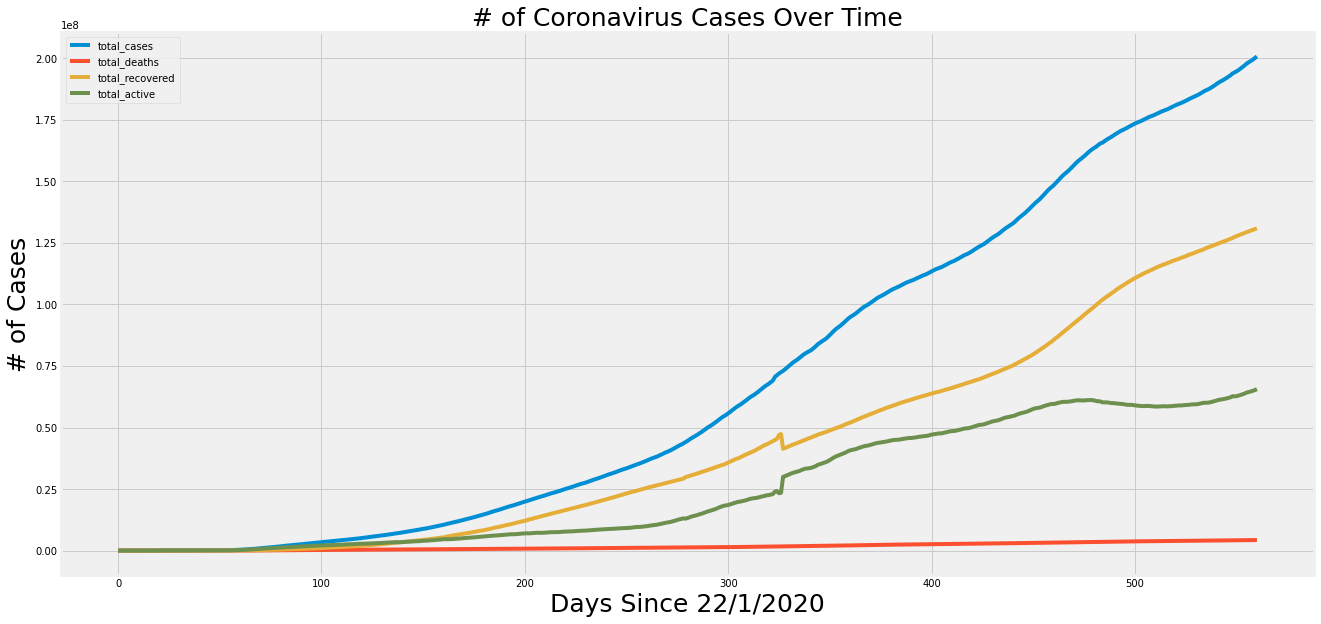

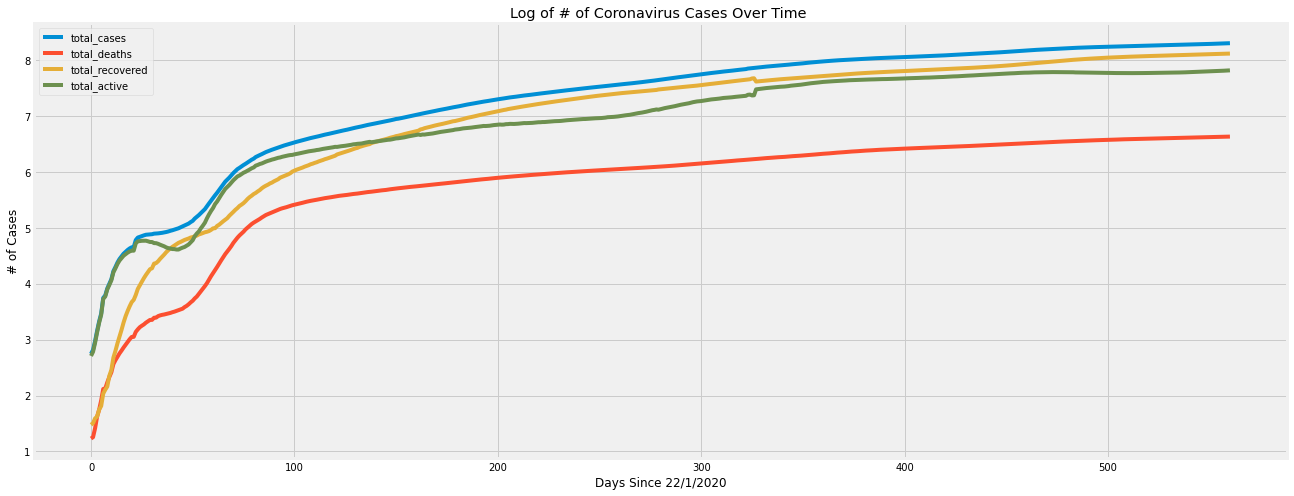

In [13]:
# Ploting subplot in figure
# Covid data subplot
df_covid.plot(kind='line', figsize=(20, 10))

plt.xlabel('Days Since 22/1/2020', fontsize=25)
plt.ylabel('# of Cases', fontsize=25)
plt.title('# of Coronavirus Cases Over Time', fontsize=25)
#ax0.legend(fontsize=20)
# let's change the index values of confirm to type integer for plotting 
df_covid_log10.plot(kind='line',figsize=(20, 8))
# Log10 Covid data subplot
plt.title('Log of # of Coronavirus Cases Over Time ')
plt.ylabel('# of Cases')
plt.xlabel('Days Since 22/1/2020')
plt.show()

## Solution 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

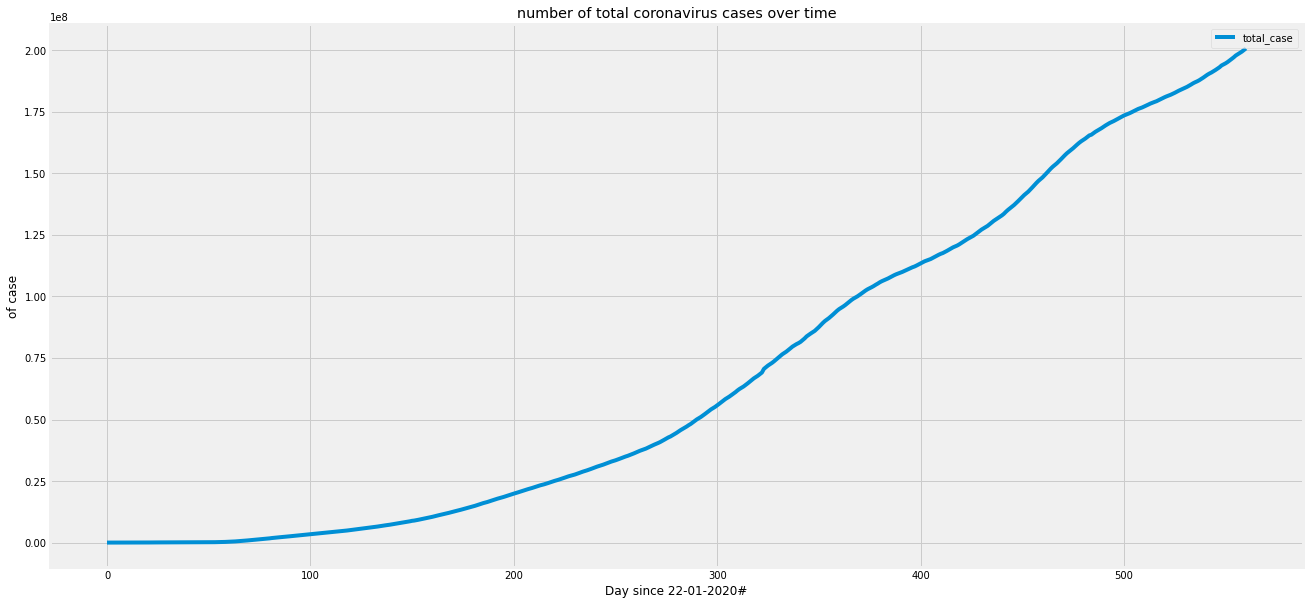

In [14]:
#Insert your code here:
#total_cases
total_case_df = pd.DataFrame(total_cases,
                             index=adjusted_dates,
                             columns=['total_case'])
total_case_df.plot(kind='line',figsize=(20,10))
plt.title('number of total coronavirus cases over time')
plt.xlabel('Day since 22-01-2020#')
plt.ylabel('of case')
plt.show()



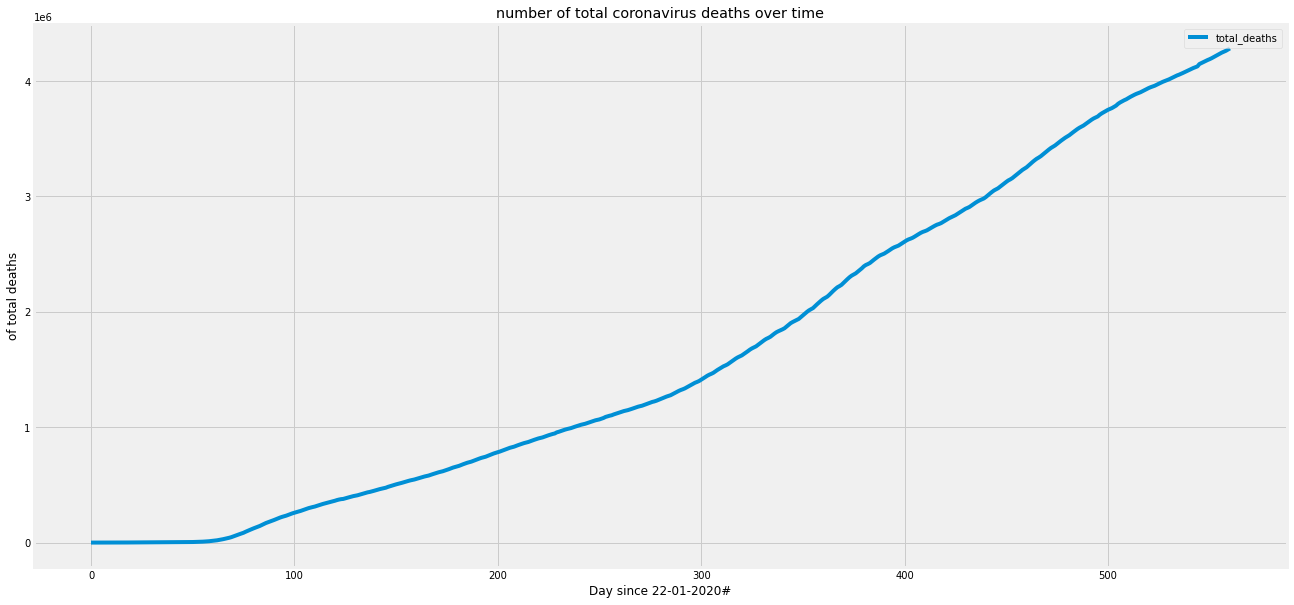

In [15]:
#total_deaths
total_deaths_df = pd.DataFrame(total_deaths,
                             index=adjusted_dates,
                             columns=['total_deaths'])
total_deaths_df.plot(kind='line',figsize=(20,10))
plt.title('number of total coronavirus deaths over time')
plt.xlabel('Day since 22-01-2020#')
plt.ylabel('of total deaths')
plt.show()


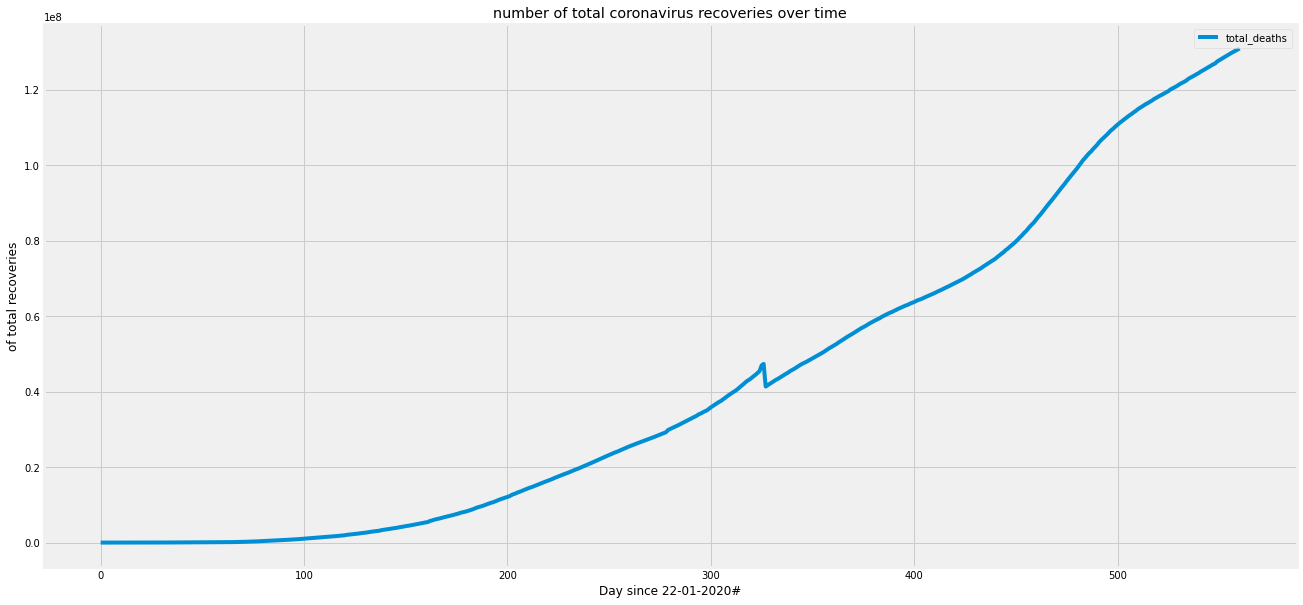

In [16]:
#total_recoveries
total_recoveries_df = pd.DataFrame(total_recoveries,
                             index=adjusted_dates,
                             columns=['total_deaths'])
total_recoveries_df.plot(kind='line',figsize=(20,10))
plt.title('number of total coronavirus recoveries over time')
plt.xlabel('Day since 22-01-2020#')
plt.ylabel('of total recoveries')
plt.show()


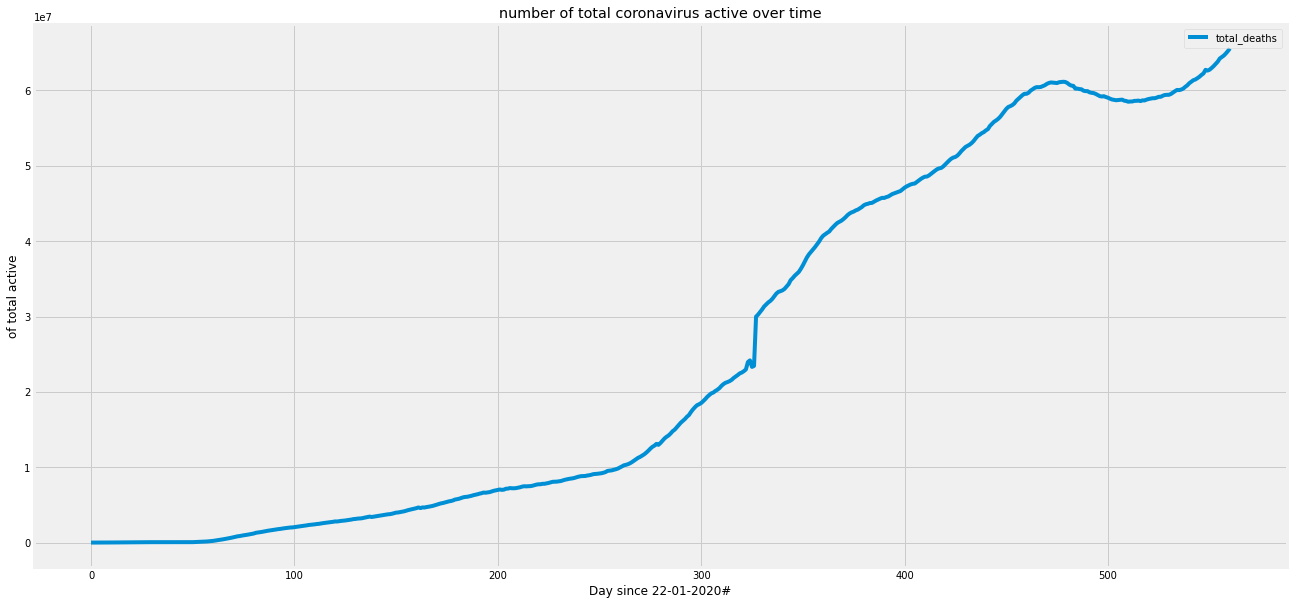

In [17]:
#total_active
total_active_df = pd.DataFrame(total_active,
                             index=adjusted_dates,
                             columns=['total_deaths'])
total_active_df.plot(kind='line',figsize=(20,10))
plt.title('number of total coronavirus active over time')
plt.xlabel('Day since 22-01-2020#')
plt.ylabel('of total active')
plt.show()

## Solution 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [18]:
#Insert your code here:
df_covid_previous_day = pd.concat([df_covid[0:1], df_covid[:-1]], axis=0, ignore_index=True)
df_convid_increase_daily = df_covid - df_covid_previous_day
df_convid_increase_daily

,total_cases,total_deaths,total_recovered,total_active
0,0,0,0,0
1,100,1,2,97
2,287,8,7,272
3,493,16,3,474
4,683,14,14,655
...,...,...,...,...
556,519680,8862,303929,206889
557,485128,7418,289178,188532
558,566653,8100,283144,275409
559,634165,10353,304468,319344


## Solution 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.
    

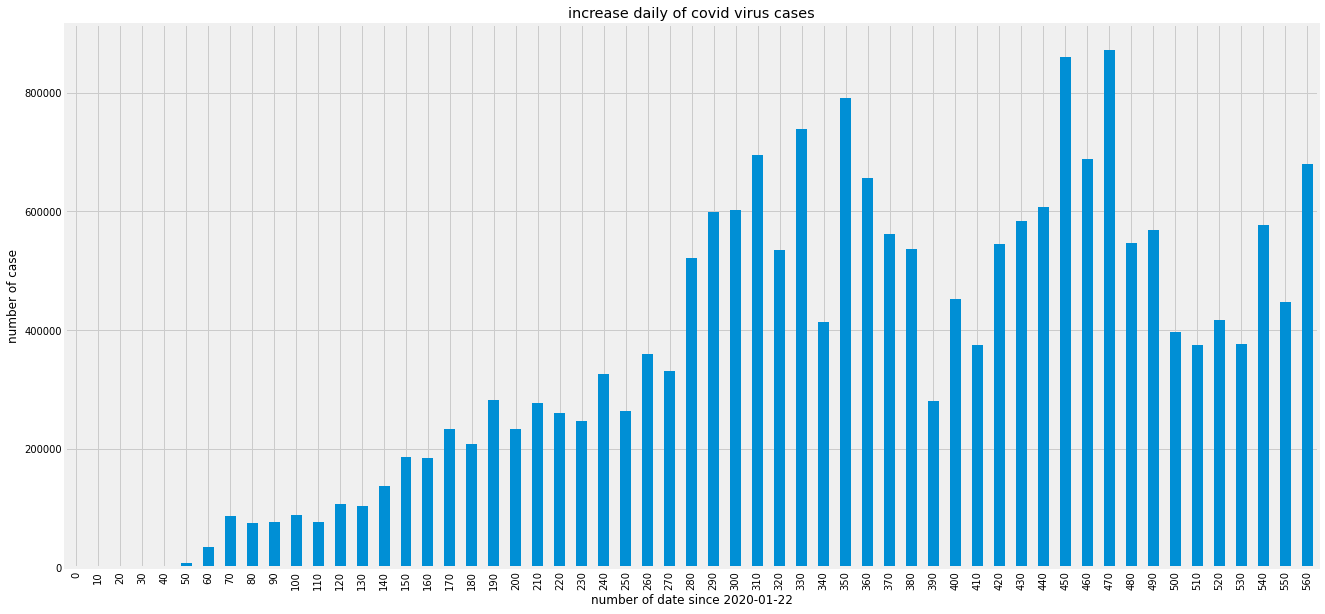

In [55]:
#Insert your code here:

#daily inscrease in total case
df_total_case_increase_daily = df_convid_increase_daily['total_cases'].loc[0:1000:10]
df_total_case_increase_daily.plot(kind='bar',figsize=(20,10))
plt.title('increase daily of covid virus cases')
plt.xlabel('number of date since 2020-01-22')
plt.ylabel('number of case')
plt.show()

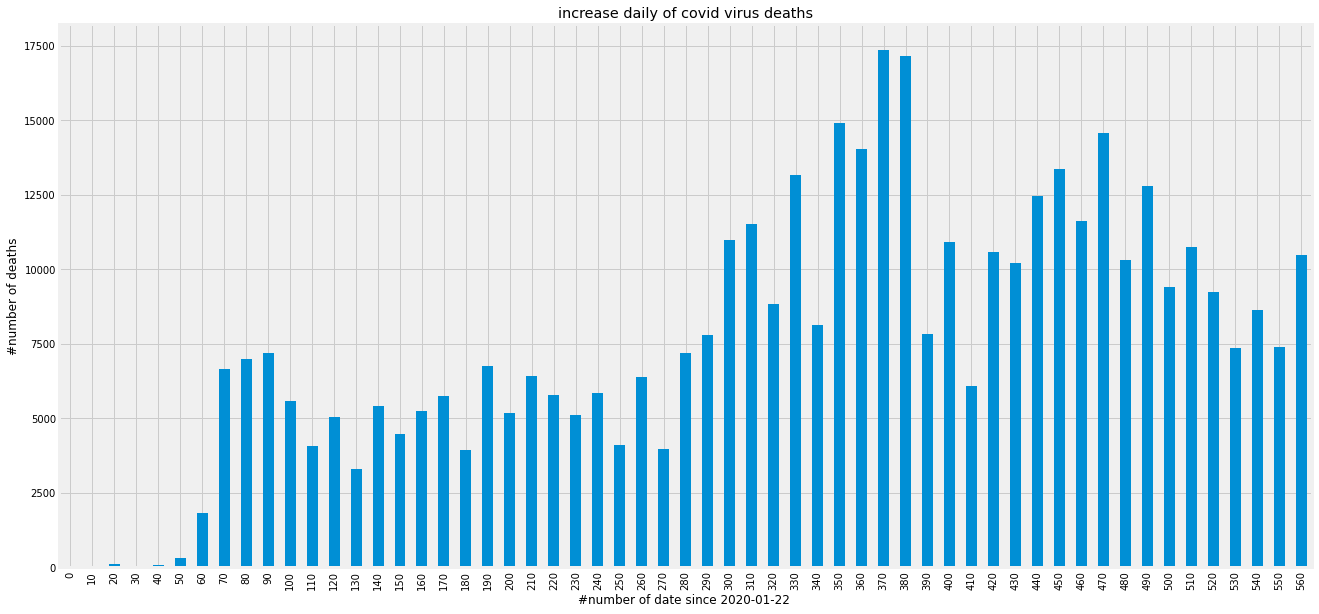

In [56]:
#daily increase in total deaths
df_total_deaths_increase_daily = df_convid_increase_daily['total_deaths'].loc[0:1000:10]
df_total_deaths_increase_daily.plot(kind='bar',figsize=(20,10))
plt.title('increase daily of covid virus deaths')
plt.xlabel('#number of date since 2020-01-22 ')
plt.ylabel('#number of deaths')

plt.show()
# df_total_deaths_increase_daily

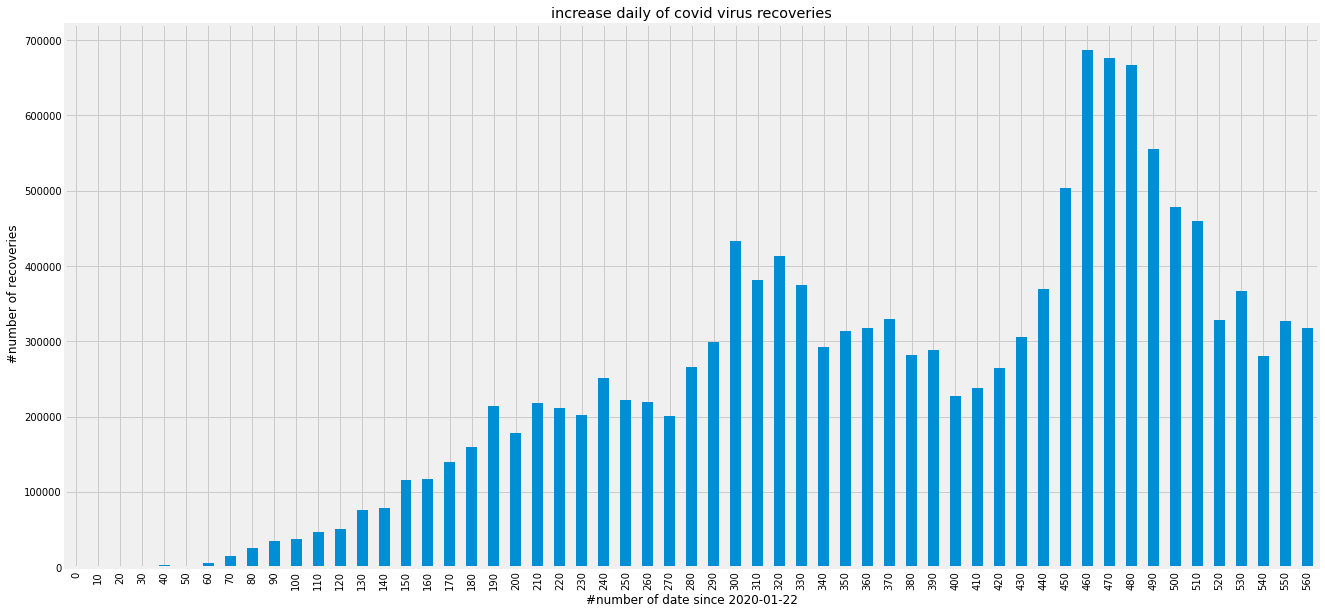

In [57]:
 #daily increase in total recovered 
df_total_recoveries_increase_daily = df_convid_increase_daily['total_recovered'].loc[0:1000:10]
df_total_recoveries_increase_daily.plot(kind='bar',figsize=(20,10))
plt.title('increase daily of covid virus recoveries')
plt.xlabel('#number of date since 2020-01-22')
plt.ylabel(' #number of recoveries')
plt.show()

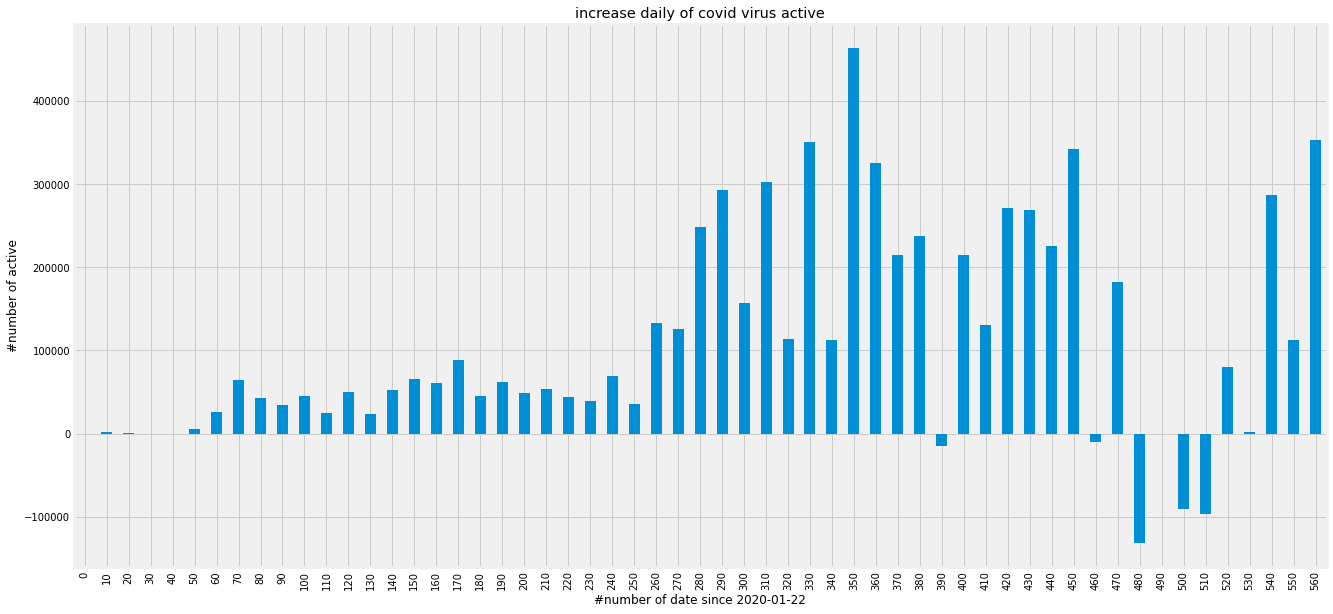

In [58]:
#daily increase in total active
df_total_active_increase_daily = df_convid_increase_daily['total_active'].loc[0:1000:10]
df_total_active_increase_daily.plot(kind='bar',figsize=(20,10))
plt.title('increase daily of covid virus active')
plt.xlabel('#number of date since 2020-01-22')
plt.ylabel('#number of active')
plt.show()

# Solution 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [23]:
#Insert your code here:
mortality_rate=(df_covid['total_deaths']/df_covid['total_cases'])*100
#mortality_rate
recovered_rate = (df_covid['total_recovered'])/df_covid['total_cases']*100

In [24]:
# Create covid percentage df
df_covid_percentage = pd.DataFrame(zip(mortality_rate,recovered_rate), 
                                   index=adjusted_dates, 
                                   columns=['mortality_rate','recovered_rate'])
df_covid_percentage

,mortality_rate,recovered_rate
0,3.052065,5.385996
1,2.739726,4.870624
2,2.754237,4.131356
3,2.922756,2.922756
4,2.641509,2.641509
...,...,...
556,2.140483,65.378947
557,2.138992,65.364871
558,2.136976,65.321125
559,2.135377,65.266258


# Solution 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

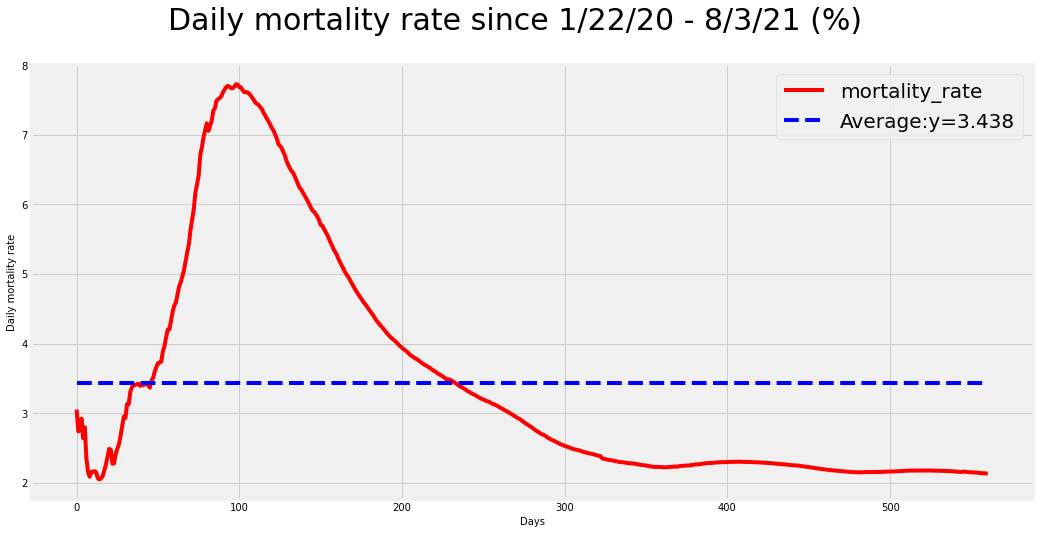

In [25]:
# #Insert your code here:
df_covid_percentage['mortality_rate'].plot(kind='line',color='red',figsize=(16,8))

plt.suptitle('Daily mortality rate since 1/22/20 - 8/3/21 (%)', fontsize = 30)
plt.xlabel('Days', fontsize = 10)
plt.ylabel('Daily mortality rate', fontsize = 10)
# Calculate the average of mortality_rate
avg_number = round(df_covid_percentage['mortality_rate'].mean(),3)
avg_arr = [avg_number for i in range(len(df_covid_percentage['mortality_rate']))]              # Create average array

# Plot the average line to the chart
plt.plot(avg_arr, ls="--", color='blue', label=f"Average:y={avg_number}")
plt.legend(fontsize=20)
plt.show()
                     

**7.2** 

    Visualize the recovery rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovery rate of all the time.

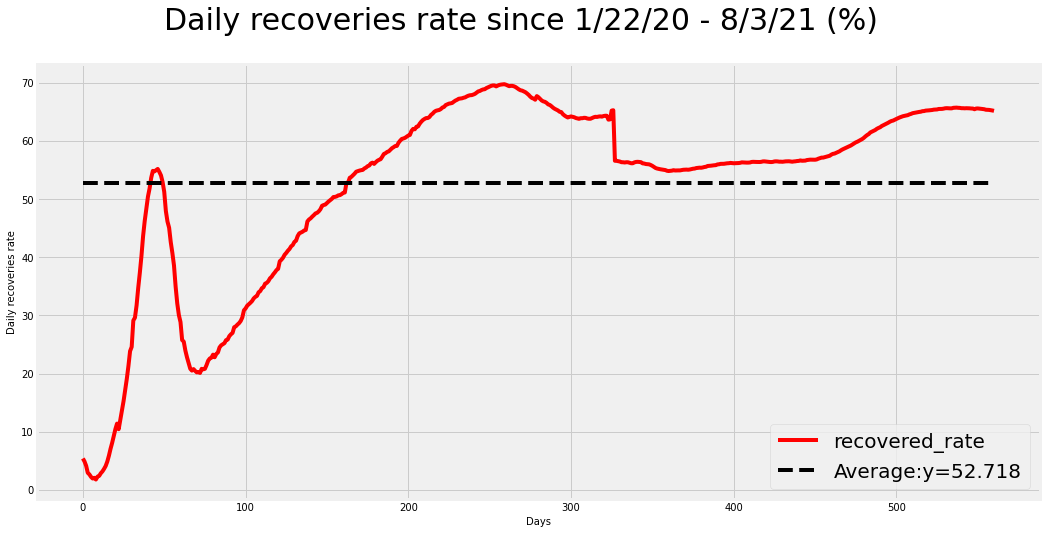

In [26]:
#Insert your code here:
df_covid_percentage['recovered_rate'].plot(kind='line',color='red',figsize=(16,8))
#average of recovery rate
avg_recovery = round(df_covid_percentage['recovered_rate'].mean(),3)
avg_arr = [avg_recovery for j in range(len(df_covid_percentage['recovered_rate']))]
#plot of avg of recovery 
plt.plot(avg_arr, ls="--",color='black',label=f"Average:y={avg_recovery}")

plt.xlabel('Days', fontsize = 10)
plt.ylabel('Daily recoveries rate', fontsize = 10)
plt.suptitle('Daily recoveries rate since 1/22/20 - 8/3/21 (%)', fontsize = 30)
plt.legend(fontsize=20,loc='lower right')
plt.show()

#  Continent Analysis

## Data Prerocessing

In [27]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Solution 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [28]:
#Insert your code here: 

#1.confirmed_df 
#Adding continent into confirmed_df
#setting each country to continent
list_conti_code = [country_to_continent_code(country) for country in confirmed_df['Country/Region']]
#get list continent name from list_conti_code 
list_continent = [continents[conti_code] for conti_code in list_conti_code]
# Add continent column
confirmed_df['continent'] = list_continent
#confirmed_df['continent']

new_position_continent = ['Province/State','Country/Region','Lat','Long','continent'] + dates
confirmed_df = confirmed_df[new_position_continent]

#2.recoveries_df 
#setting each country to continent 
list_countries = []
list_continent_reco_code = []
for country in recoveries_df['Country/Region']:
    list_countries.append(country)
for country in list_countries:
    list_continent_reco_code.append(country_to_continent_code(country))
#add conti_code to conti_name 
list_continent_reco = []    
for conti_code in list_continent_reco_code:
    list_continent_reco.append(continents[conti_code])
#add continent to recoveries_df 
recoveries_df['continent'] = list_continent_reco
#change the postion of continent in recoveries_df
recoveries_df = recoveries_df[new_position_continent]
#3.deaths_df 
#setting each country to contient 
list_countries_death =[]
list_continent_death_code = []
for country in deaths_df['Country/Region']:
    list_countries_death.append(country)
for country in list_countries_death:
    list_continent_death_code.append(country_to_continent_code(country))
#add conti_death_code to conti_name 
list_continent_death = []
for death_code in list_continent_death_code:
    list_continent_death.append(continents[death_code])
deaths_df['continent'] = list_continent_death
#change the position of continent in deaths_df 
deaths_df = deaths_df[new_position_continent]
deaths_df

,Province/State,Country/Region,Lat,Long,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,Asia,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.153300,20.168300,Europe,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.033900,1.659600,Africa,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.506300,1.521800,Europe,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.202700,17.873900,Africa,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,Others,0,0,0,0,0,...,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
285,NaN,Winter Olympics 2022,39.904200,116.407400,Others,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,Asia,0,0,0,0,0,...,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
287,NaN,Zambia,-13.133897,27.849332,Africa,0,0,0,0,0,...,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430


In [29]:
#1. set index for countries infor df
#continent: Country continent.
list_countries = confirmed_df.drop_duplicates(subset=['Country/Region'])
list_countries.set_index(['Country/Region'], inplace=True)
countries_info = list_countries[['Lat', 'Long', 'continent']]
countries_info 

,Lat,Long,continent
Country/Region,,,
Afghanistan,33.939110,67.709953,Asia
Albania,41.153300,20.168300,Europe
Algeria,28.033900,1.659600,Africa
Andorra,42.506300,1.521800,Europe
Angola,-11.202700,17.873900,Africa
...,...,...,...
West Bank and Gaza,31.952200,35.233200,Others
Winter Olympics 2022,39.904200,116.407400,Others
Yemen,15.552727,48.516388,Asia


# Solution 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [30]:
#Insert your code here:
#confirmed_df
#deaths_df
#recoveries_df
#df_mortality_rate
#df_total_active_increase_daily

#2. Create confirmed cases by country df
list_confirmed = confirmed_df.groupby(['Country/Region']).sum()
countries_confirmed = list_confirmed.iloc[:,-1]

#3.Create deaths case by country df 
list_deaths =deaths_df.groupby(['Country/Region']).sum()
countries_deaths =list_deaths.iloc[:,-1]

#4.Create recoveries case by country df
list_recoveries =recoveries_df.groupby(['Country/Region']).sum()
countries_recoveries = list_recoveries.iloc[:,-1]

# Naming all column above
countries_confirmed.name = 'Confirmed'
countries_deaths.name = 'Deaths'
countries_recoveries.name = 'Recoveries'

# Create requirement table
countries_df = pd.concat([countries_info, countries_confirmed, countries_deaths, countries_recoveries], axis=1) 
#5.Create df_total_active_incease_daily
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Recoveries']+countries_df['Deaths'])
countries_df
#6.Create mortality rate by country df 
countries_df['motality_rate'] = round(countries_df['Deaths']*100/countries_df['Confirmed'],2)
# Check error value 
countries_df[countries_df['Active'] < 0]                  # Active column contain 2 negative value
#there are 3 countries with wrong data are: Austria,Guyana,Peru. Drop them! 
countries_df.drop(['Guyana', 'Peru','Austria'], inplace=True)       # Drop Three countries have an Error data
 
# Check missing data
countries_df.isna().sum()                    # Mortality Rate column contain 1 missing value
countries_df.dropna(inplace=True)            # Drop nan rows
countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,
Afghanistan,33.939110,67.709953,Asia,148933,6836,82586,59511,4.59
Albania,41.153300,20.168300,Europe,133310,2457,130314,539,1.84
Algeria,28.033900,1.659600,Africa,176724,4404,118409,53911,2.49
Andorra,42.506300,1.521800,Europe,14797,128,14380,289,0.87
Angola,-11.202700,17.873900,Africa,43158,1026,39582,2550,2.38
...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,Asia,181756,2327,54332,125097,1.28
West Bank and Gaza,31.952200,35.233200,Others,317404,3609,312320,1475,1.14
Yemen,15.552727,48.516388,Asia,7096,1380,4251,1465,19.45


# Solution 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [31]:
#Insert your code here:
#groupby dataframe by continent
continent_confirmed = confirmed_df.groupby('continent').sum()
continent_deaths = deaths_df.groupby('continent').sum()
continent_recoveries = recoveries_df.groupby('continent').sum()
#continent_active = continent_confirmed -(continent_deaths + continent_recoveries)
#continent_mortality_rate = continent_deaths*100/continent_confirmed

# Sum total confirmed, total deaths, total recoveries by continent in the latest day 
df_confirmed = continent_confirmed.iloc[:,-1]
df_deaths = continent_deaths.iloc[:,-1]
df_recoveries = continent_recoveries.iloc[:,-1]
df_active  = df_confirmed -(df_deaths + df_recoveries)
continent_mortality_rate = round(df_deaths*100/df_confirmed,2)

# Naming three Series above
df_confirmed.name = 'Confirmed'
df_deaths.name = 'Deaths'
df_recoveries.name = 'Recoveries'
df_active.name ='Active'
continent_mortality_rate.name = 'Mortality Rate'
# Create continents dataframe
continents_df = pd.concat([df_confirmed, df_deaths, df_recoveries,df_active,continent_mortality_rate], axis=1) 
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902753,57853343,3780630,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167112,27947075,23334358,2.23
North America,42349756,924591,5776939,35648226,2.18
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [32]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Solution 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

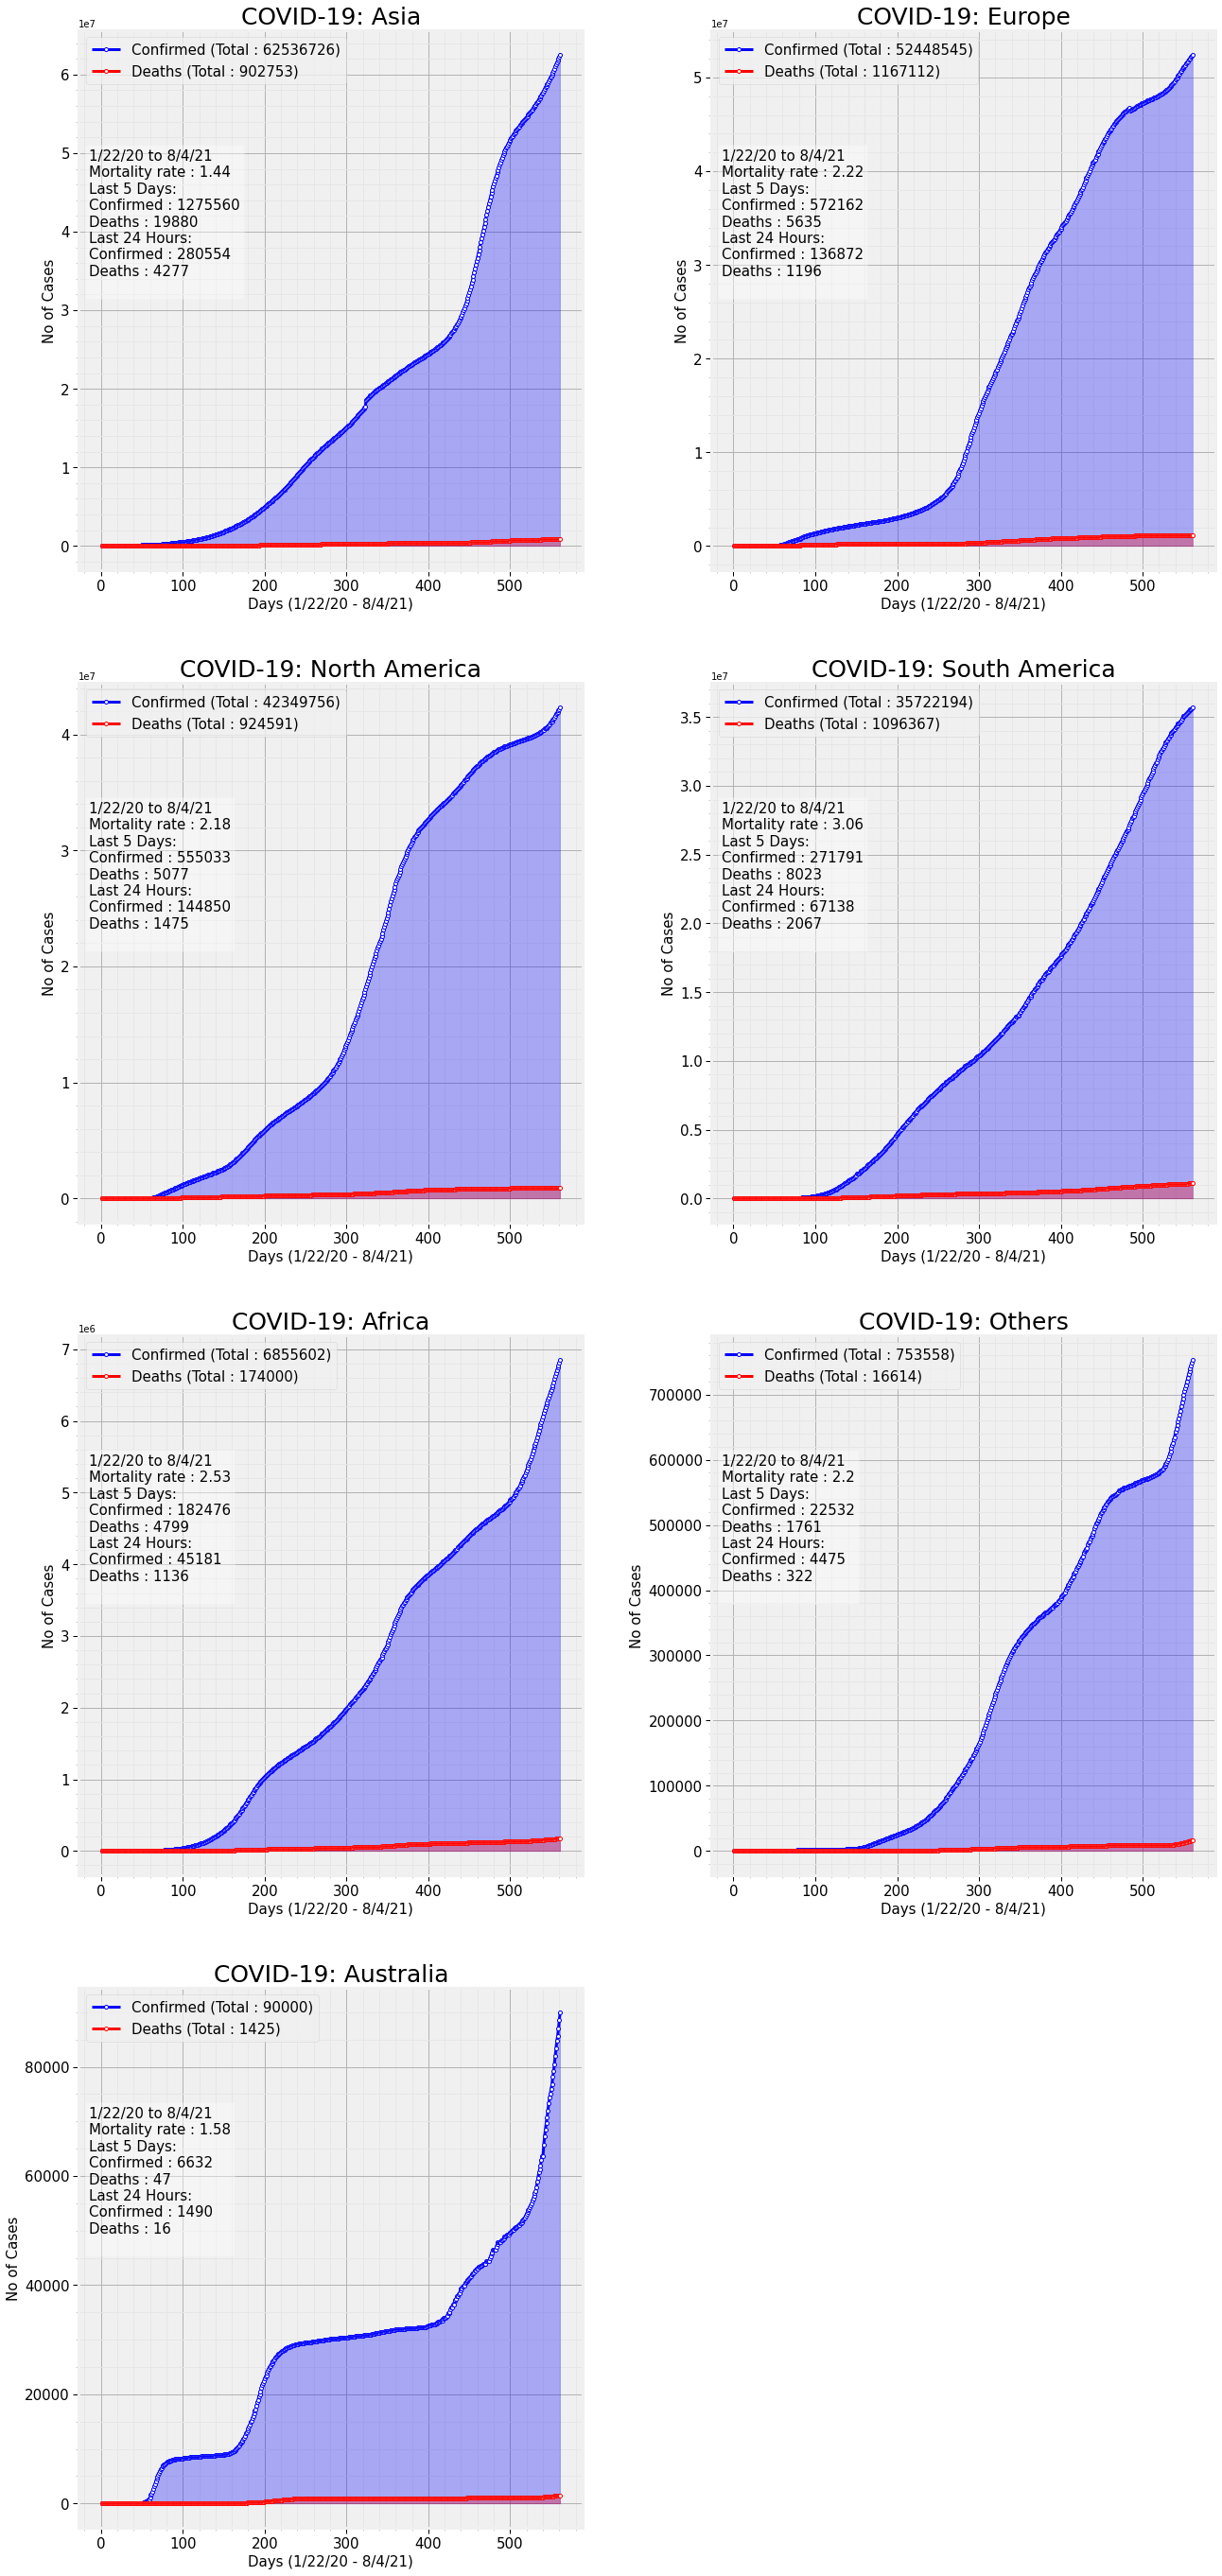

In [33]:
#Insert your code here:
# Create 7 subplots
figure = plt.figure(figsize=(20,40))
fig1=[figure, 4, 2, 1]
fig2=[figure, 4, 2, 2]
fig3=[figure, 4, 2, 3]
fig4=[figure, 4, 2, 4]
fig5=[figure, 4, 2, 5]
fig6=[figure, 4, 2, 6]
fig7=[figure, 4, 2, 7]

visualize_covid_cases(confirmed_df, deaths_df,
                          continents['AS'] , country = None , state = None, period = None, figure =fig1,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,
                          continents['EU'] , country = None , state = None, period = None, figure =fig2,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,
                          continents['NA'] , country = None , state = None, period = None, figure =fig3,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,
                          continents['SA'] , country = None , state = None, period = None, figure =fig4,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,
                          continents['AF'] , country = None , state = None, period = None, figure =fig5,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,
                          continents['na'] , country = None , state = None, period = None, figure =fig6,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,
                          continents['OC'] , country = None , state = None, period = None, figure =fig7,
                          scale = "linear")


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [34]:
#Insert your code here:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
#add recoveries as new param    
def visualize_covid_cases(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    #add recoveries
    stats = [confirmed, deaths,recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","yellow"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
    
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    #add recoveries
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    #add recoveries
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        
        plt.show()
        


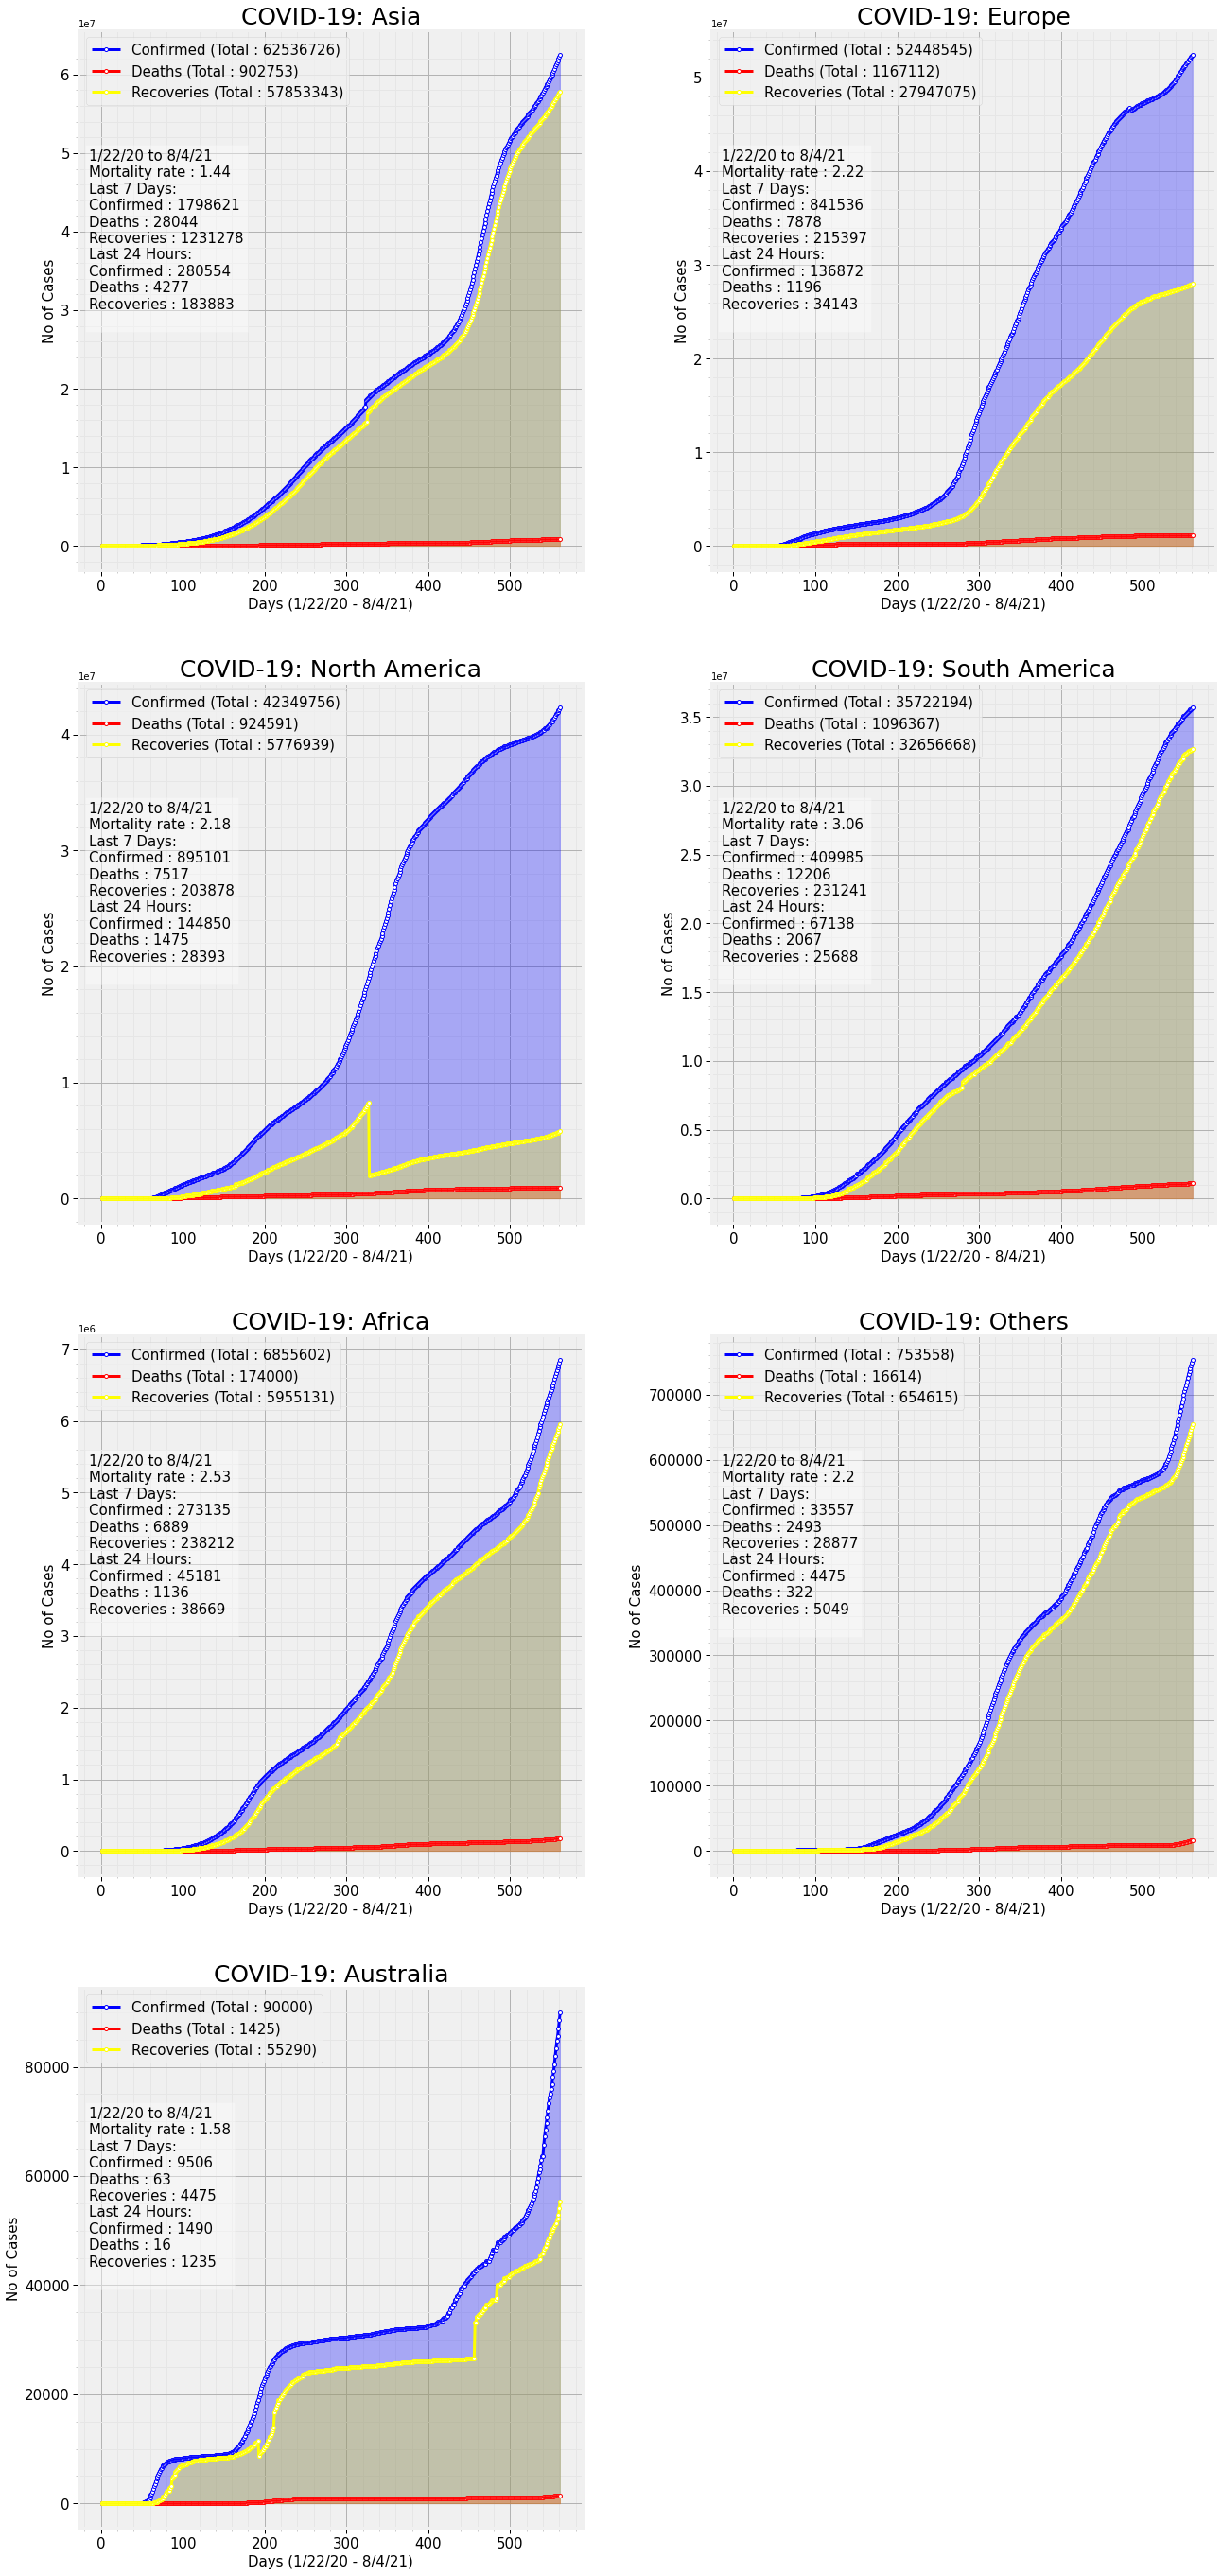

In [35]:
#draw with customize function
################################ PLOTING 7 CONTINENT CHART ################################ 

# Create 7 subplots
figure = plt.figure(figsize=(20,40))
fig1=[figure, 4, 2, 1]
fig2=[figure, 4, 2, 2]
fig3=[figure, 4, 2, 3]
fig4=[figure, 4, 2, 4]
fig5=[figure, 4, 2, 5]
fig6=[figure, 4, 2, 6]
fig7=[figure, 4, 2, 7]

visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['AS'] , country = None , state = None, period = None, figure =fig1,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['EU'] , country = None , state = None, period = None, figure =fig2,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['NA'] , country = None , state = None, period = None, figure =fig3,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['SA'] , country = None , state = None, period = None, figure =fig4,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['AF'] , country = None , state = None, period = None, figure =fig5,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['na'] , country = None , state = None, period = None, figure =fig6,
                          scale = "linear")
visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continents['OC'] , country = None , state = None, period = None, figure =fig7,
                          scale = "linear")

# Solution 12
    Visualize the covariance matrix for continents_df.

<AxesSubplot: >

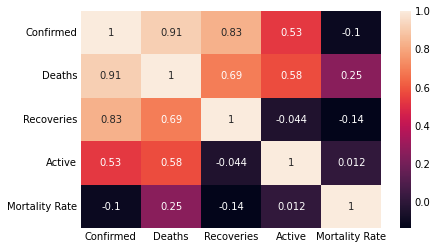

In [36]:
#Insert your code here:
# continents_df.corr()
continent_corr = continents_df.corr()
sns.heatmap(continent_corr, annot=True)

# Solution 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

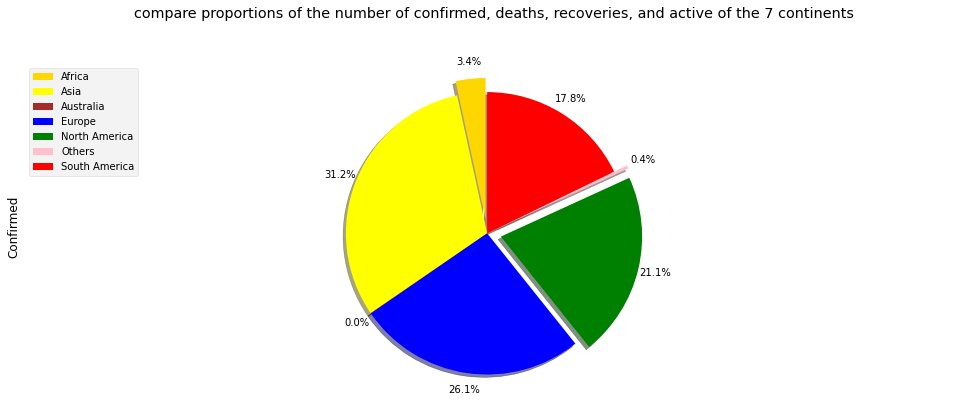

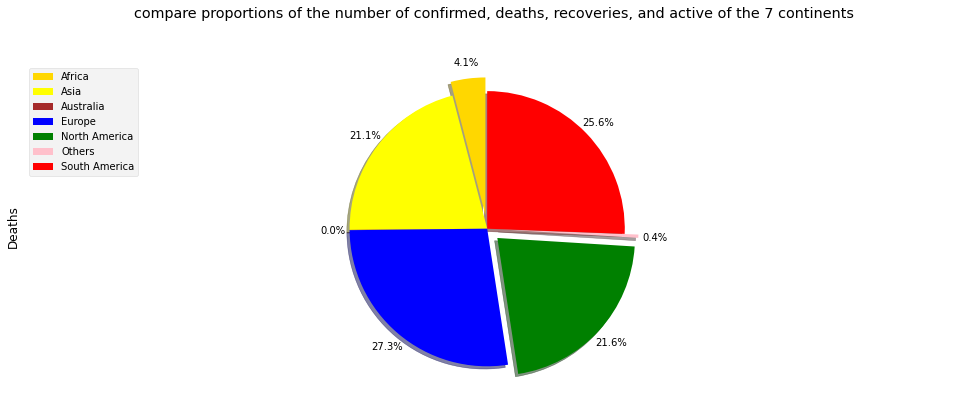

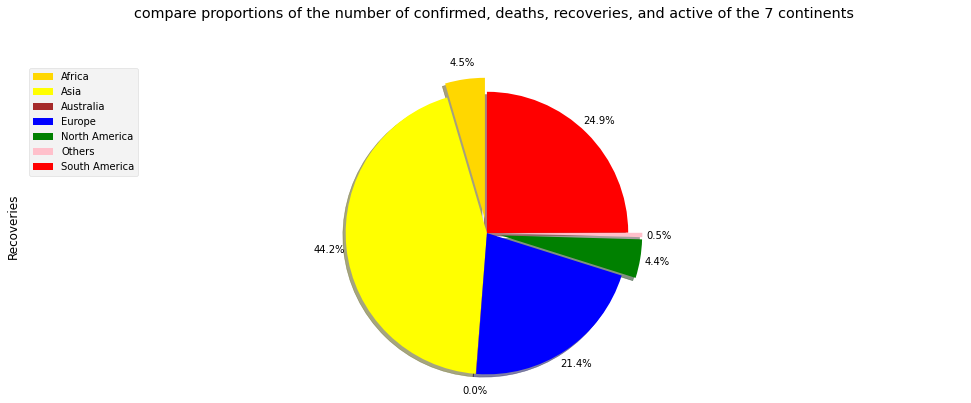

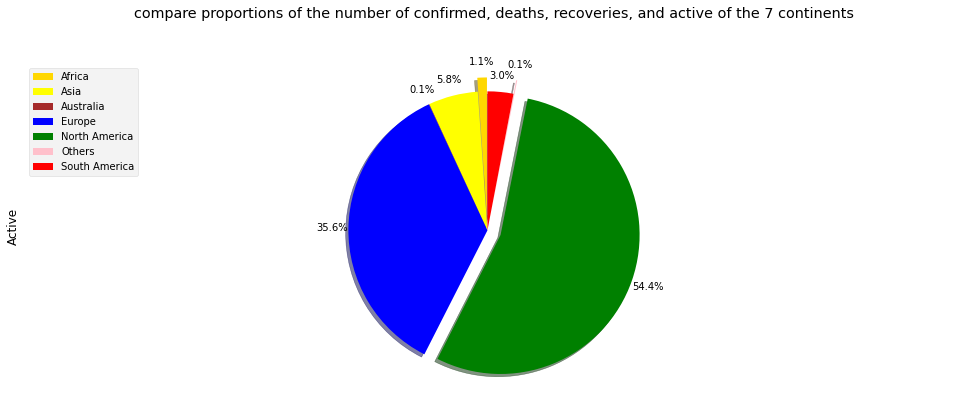

In [37]:
#Insert your code here:
import folium
colors_list = ['gold', 'yellow', 'brown', 'blue', 'green', 'pink','red']
columns = ['Confirmed','Deaths','Recoveries','Active']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0] # ratio for each continent with which to offset each wedge.
for column in columns:
    # Set up subplot
    f = plt.figure(figsize=(12,15))         # Create figure
    ax = f.add_subplot(111)                   # add Sub plot
#    m = folium.map(location=[45.5236, -122.6750])(111)                 # add Sub plot
    # Ploting the pie chart
    continents_df[column].plot(kind='pie',figsize=(15, 6),colors=colors_list,autopct='%1.1f%%',
                               startangle=90,shadow=True,labels=None,pctdistance=1.12,
                               ax=ax,explode=explode_list)
    #scale the title up by 12% to match pctdistance
    plt.title('compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents', y=1.12) 
    plt.axis('equal') 
    # add legend
    plt.legend(labels=continents_df.index, loc='upper left') 
plt.show()     

In [38]:
#another way to draw each pie chart for confirmed,deaths,recoveries,acive
label = ['Asia', 'Oceania', 'Europe', 'na', 'North America', 'Africa', 'South America']
data_confirmed = continents_df['Confirmed']
data_deaths        = continents_df['Deaths']
data_recoveries    = continents_df['Recoveries']
data_active        = continents_df['Active']


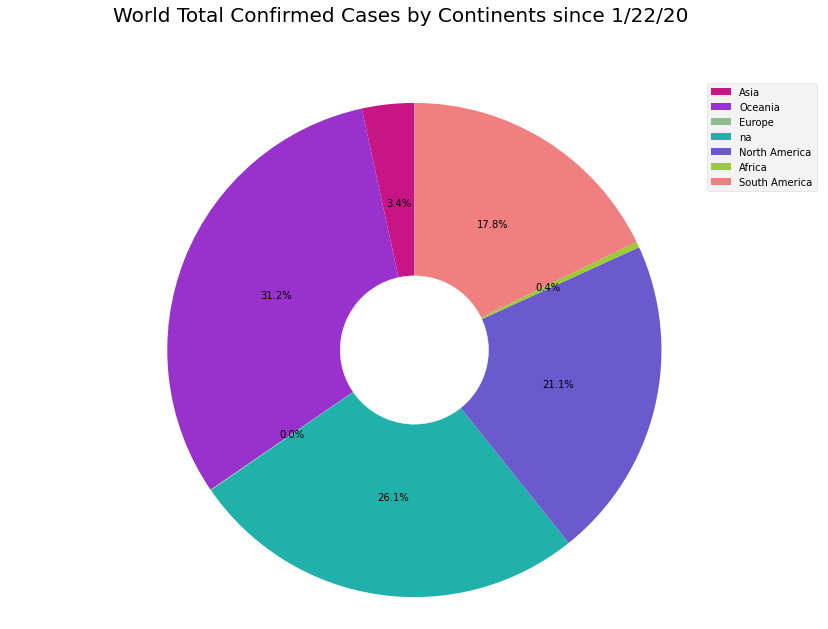

In [39]:
#confirmed
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_confirmed, autopct='%1.1f%%',startangle=90, colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Confirmed Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

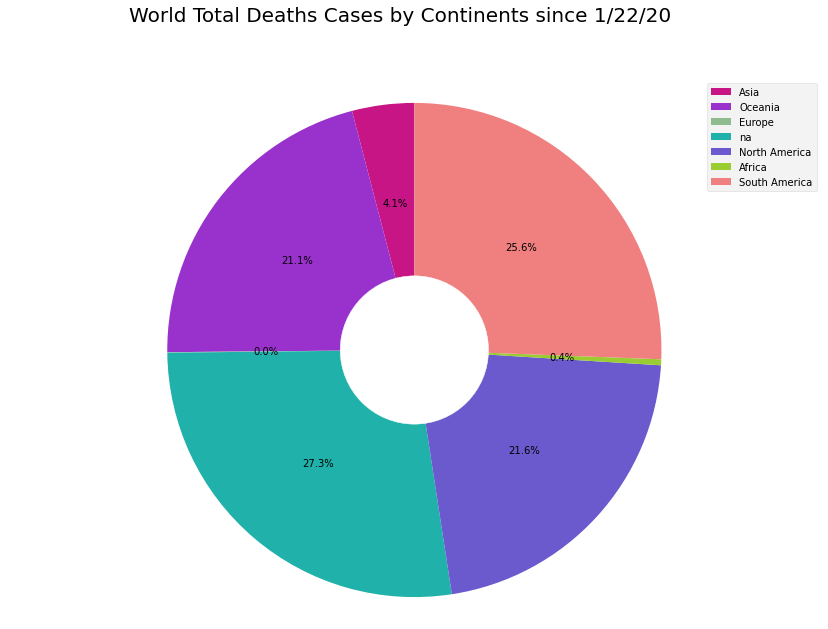

In [40]:
#death
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_deaths, autopct='%1.1f%%',startangle=90, colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Deaths Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

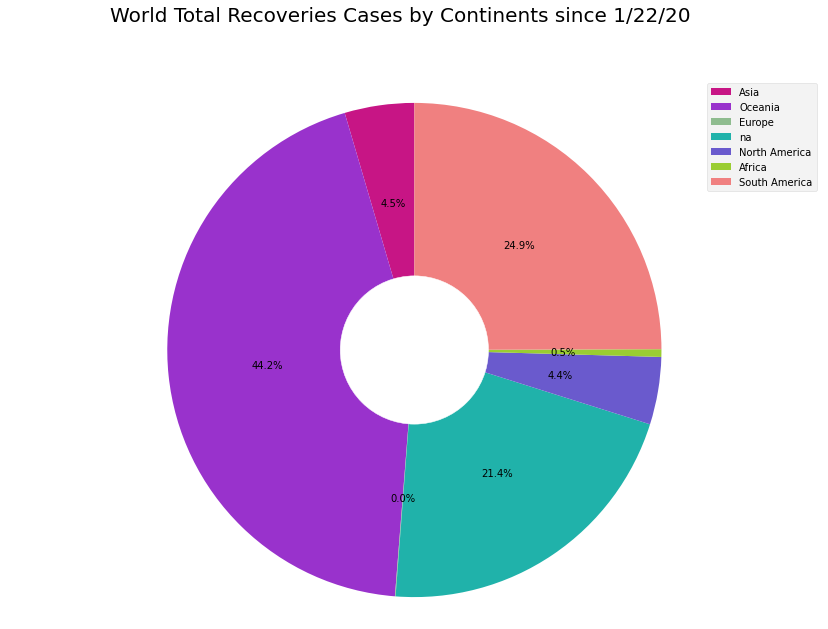

In [41]:
#recoveries
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_recoveries, autopct='%1.1f%%',startangle=90, colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Recoveries Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

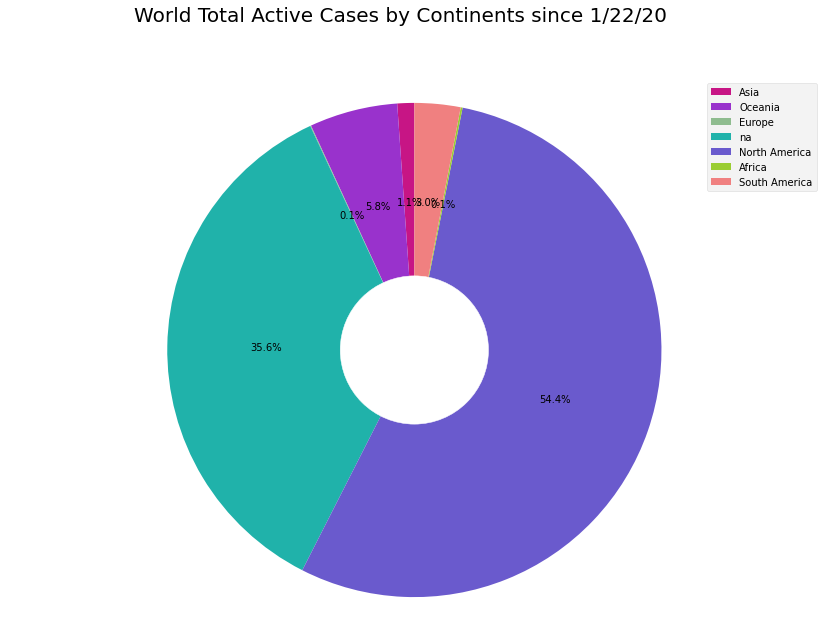

In [42]:
#active
plt.figure(figsize = (13,10))
my_circle = plt.Circle((0, 0), 0.3, color='white')
plt.pie(data_active, autopct='%1.1f%%',startangle=90, colors = ['mediumvioletred', 'darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Active Cases by Continents since 1/22/20', fontsize = 20)
plt.legend(label)
plt.show()

# Country analysis

# Solution 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [43]:
#Insert your code here:
word_map = folium.Map(location=[20,0], tiles="CartoDB Positron", zoom_start=2)


# add Circle one by one on the map
for i in range(len(countries_df)):
    #  get information for each Country 
    country_name = countries_df.index[i]
    latitude = countries_df.iloc[i]['Lat']
    longtitude = countries_df.iloc[i]['Long']
    confirmed = countries_df.iloc[i]['Confirmed']
    deaths = countries_df.iloc[i]['Deaths']
    recoveries = countries_df.iloc[i]['Recoveries']
    mortality_rate = countries_df.iloc[i]['motality_rate']
    
    # Create html text
    html=f"""
            <div>
                <h5 style="text-align: center;"><b>{country_name}</b></h5>
                <hr style="margin: 0 0 10px 0">
                <li style="list-style:circle;">Confirmed: {confirmed}</li>
                <li style="list-style:circle;">Deaths: {deaths}</li>
                <li style="list-style:circle;">Recovered: {recoveries}</li>
                <li style="list-style:circle;">Mortality Rate: {mortality_rate}</li>
            </div>
          """
    
    # add Circle to the map
    folium.Circle(
        location=[latitude, longtitude],
        tooltip=html,
        radius=float(confirmed)/100,
        color='#FC7F03',
        fill=True,
       # fill_color='#FC7F03',
       # color="crimson",
        fill_color="#3186cc",
        popup="Covid 19 is so dangerous",
    ).add_to(word_map)
    
    
# Show the word map
word_map


In [44]:
countries_active_cases = countries_df[['Lat', 'Long', 'Active']].copy()
countries_active_cases.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Azerbaijan',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=191)

# Solution 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [45]:
#Insert your code here:
import plotly.express as px


countries_active_cases = countries_df[['Lat', 'Long', 'Active']].copy()

# Remove all 0 value in Active column
countries_active_cases['Active'].replace(0, np.NaN, inplace=True)
countries_active_cases.dropna(inplace=True)

#exchange active to int to call log10 function 
countries_active_cases['Active'].astype('int64')

# Calculate log10 of Countries's Activie Case
countries_active_cases['Log10 Active'] = np.log10(countries_active_cases['Active'])

# Ploting log 10 Active case by countries
fig = px.scatter_geo(countries_active_cases, lat='Lat', lon='Long', color=countries_active_cases.index, 
                     hover_name=countries_active_cases.index, size='Log10 Active')

fig.update_layout(title="Log 10 Active Cases by Countries",
                  legend_title_text='Country')

fig.show()

# Solution 16
    Filter the top 10 countries based on the number of confirmed cases.

In [46]:
#Insert your code here:
# method 1
top10 = countries_df['Confirmed'].nlargest(n=10)
#top10: method 2
top10_confirmed_countries = countries_df.sort_values(by="Confirmed", ascending=False).head(10)
top10_confirmed_countries

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,
USA,40.000000,-100.000000,North America,35458569,611295,0,34847274,1.72
India,20.593684,78.962880,Asia,31812114,426290,30974748,411076,1.34
Brazil,-14.235000,-51.925300,South America,20034407,559944,17771228,1703235,2.79
Russia,61.524010,105.318756,Europe,6274006,159032,5609682,505292,2.53
France,3.933900,-53.125800,Europe,6272466,112245,415111,5745110,1.79
United Kingdom,18.220600,-63.068600,Europe,5980830,157181,24693,5798956,2.63
Turkey,38.963700,35.243300,Asia,5822487,51767,5478185,292535,0.89
Argentina,-38.416100,-63.616700,South America,4975616,106747,4615834,253035,2.15
Colombia,4.570900,-74.297300,South America,4815063,121695,4615354,78014,2.53


# Solution 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [47]:
#Insert your code here:
x = top10_confirmed_countries.index
# Create figure
fig = go.Figure()

# Create trace for each categories
trace0 = go.Bar(x=x, y=top10_confirmed_countries['Deaths'], name ='Deaths')
trace1 = go.Bar(x=x, y=top10_confirmed_countries['Recoveries'], name ='Recoveries')
trace2 = go.Bar(x=x, y=top10_confirmed_countries['Active'], name ='Active')

# Adding trace to figure
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)

# Setting layout
fig.update_layout(barmode='stack', 
                  title="Top 10 Countries (Confirmed Cases)",
                  xaxis_title="Country",
                  yaxis_title="# of Cases")
fig.update_xaxes(tickangle=45)

# Show plot
fig.show()

In [48]:
#18 
###nhìn vào biểu đồ line chart ở câu 2, thì các line active,deaths,recoveries,confirmed đều ở xu hướng tăng. 
###cho nên với data hiện tại từ 20/1/2020 thì vẫn chưa qua được đỉnh của dịch. 


In [49]:
###Problem 19
continents_df.head()
#the death rate of each continent 
continents_df['Death Rate %'] = (continents_df['Deaths']/continents_df['Deaths'].sum()) * 100
continents_df.sort_values('Death Rate %', ascending = False).head() # châu Âu có tỉ lệ tử vong cao nhất ~27%

continents_df['Active Rate'] =(continents_df['Active']/continents_df['Active'].sum())*100
#continents_df.sort_values('Active Rate',ascending =False).head()# Nort america có tỉ lệ nhiễm cao nhất

continents_df['Recoveries'] =(continents_df['Recoveries']/continents_df['Recoveries'].sum()) * 100
#continents_df['Recoveries'] #--> Asia có tốc độ hồi phục cao nhất, hơn 44%

# Advanced Analysis
 

# Solution 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Answer:
    Nhìn vào biểu đồ line chart ở câu 2, thì các line active, deaths, recoveries, confirmed đều ở xu hướng tăng cho nên với data hiện tại từ 20/1/2020 thì vẫn chưa qua được đỉnh của dịch. 
     

# Solution 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


# Châu Âu có tỉ lệ tử vong cao nhất ~27%

# North america có tỉ lệ nhiễm cao nhất

# Asia có tốc độ hồi phục cao nhất, hơn 44%


In [62]:
continents_df['Death Rate %'] = (continents_df['Deaths']/continents_df['Deaths'].sum()) * 100
continents_df.sort_values('Death Rate %', ascending = False).head() 

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %,Active Rate
continent,,,,,,,
Europe,52448545,1167112,21.350096,23334358,2.23,27.250750,35.584523
South America,35722194,1096367,24.947977,1969159,3.07,25.598934,3.002936
North America,42349756,924591,4.413278,35648226,2.18,21.588158,54.362975
Asia,62536726,902753,44.196912,3780630,1.44,21.078265,5.765400
Africa,6855602,174000,4.549407,726471,2.54,4.062704,1.107857


In [64]:
continents_df['Active Rate'] =(continents_df['Active']/continents_df['Active'].sum())*100
continents_df.sort_values('Active Rate',ascending =False).head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %,Active Rate
continent,,,,,,,
North America,42349756,924591,4.413278,35648226,2.18,21.588158,54.362975
Europe,52448545,1167112,21.350096,23334358,2.23,27.250750,35.584523
Asia,62536726,902753,44.196912,3780630,1.44,21.078265,5.765400
South America,35722194,1096367,24.947977,1969159,3.07,25.598934,3.002936
Africa,6855602,174000,4.549407,726471,2.54,4.062704,1.107857


In [65]:
continents_df['Recoveries'] =(continents_df['Recoveries']/continents_df['Recoveries'].sum()) * 100
continents_df['Recoveries'] 

continent
Africa            4.549407
Asia             44.196912
Australia         0.042239
Europe           21.350096
North America     4.413278
Others            0.500091
South America    24.947977
Name: Recoveries, dtype: float64

# Solution 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [50]:
#the death rate of each country 
countries_df['Death Rate %'] = (countries_df['Deaths']/countries_df['Deaths'].sum()) * 100
#the spread rate of each country 
countries_df['Active Rate %'] = (countries_df['Active']/countries_df['Active'].sum()) * 100
#the recoveries rate of each country 
countries_df['Recoveries Rate %'] = (countries_df['Recoveries']/countries_df['Recoveries'].sum()) * 100
countries_df['Country/Region'] = countries_df['Death Rate %'].sort_values(ascending=False)


In [51]:
# 20.1 USA là nước chiếm tỉ lệ tử vong cao nhất trên thế giới (15.10%)
countries_df.sort_values('Death Rate %', ascending = False).head(1)
# 20.2 USA cũng là nước có tỉ lệ lây lan cao nhất 
countries_df.sort_values('Active Rate %', ascending = False).head(1)
# 20.3 Ấn độ là nước có tỉ lệ hồi phục cao nhất 
countries_df.sort_values('Recoveries Rate %', ascending = False).head(1)


,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %,Active Rate %,Recoveries Rate %,Country/Region
Country/Region,,,,,,,,,,,,
India,20.593684,78.96288,Asia,31812114,426290,30974748,411076,1.34,10.467544,0.625306,24.171402,10.467544


# Solution 21
**USA dataset**

In [52]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data.head()


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,16916.662680,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1250.876152,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975


Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [53]:
#Insert your code here:
# 21.1 Connecticut 
us_medical_data.sort_values(by='Mortality_Rate',ascending=False).dropna().head(1)
#21.2 New York
us_medical_data.sort_values(by='Incident_Rate',ascending=False).dropna().head(1)
#21.3 
#us_medical_data_data = us_medical_data['Recovered']/us_medical_data['Confirmed']

#texas lấy từng bang chia tổng số ca phục hồi toàn US *100
us_medical_data['Recoveries Rate %'] = (us_medical_data['Recovered']/us_medical_data['Recovered'].sum()) % 100
us_medical_data.sort_values('Recoveries Rate %', ascending = False).head(1)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Recoveries Rate %
49,Texas,US,2020-07-07 04:34:13,31.0545,-97.5635,204534,2874,103782.0,97880.0,48,...,NaN,NaN,84000048.0,USA,7462.194372,NaN,2020-07-06,2163729.0,1.404168,0.1123


# Solution 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

Coefficient of determination: 0.8092222460312464
Intercept: 52618.02455532817
Slope: [0.05905238]
Regression Equation: y = 0.0590523809234043x + 52618.02455532817


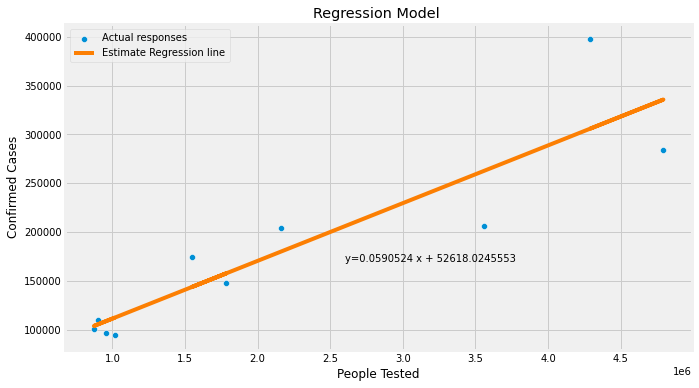

In [54]:
#Insert your code here:
from sklearn.linear_model import LinearRegression

# Top 10 state have highest confirmed
top10_state = us_medical_data.sort_values(by=['Confirmed'], ascending=False).head(10)
# top10_state

# Input data
x = np.asarray(top10_state['People_Tested']).reshape((-1, 1))
y = np.asarray(top10_state['Confirmed'])

# Create a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Predict value
xfit = x
yfit = model.predict(xfit)


# Coefficient of determination
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

# Intercept
print('Intercept:', model.intercept_)

# Slope:
print('Slope:', model.coef_)

# Equation
print(f'Regression Equation: y = {model.coef_[0]}x + {model.intercept_}')

# Plot the estimated linear regression line:
fig = plt.figure(figsize=(10,6))                                                                # Create figure

sns.scatterplot(data=top10_state, x='People_Tested', y='Confirmed', label='Actual responses')   # Actual data
plt.plot(xfit, yfit, color='#FC7F03', label="Estimate Regression line")                         # Regresion line

# Regression Equation
plt.annotate('y={0:.7f} x + {1:.7f}'.format(model.coef_[0], model.intercept_), xy=(2600000, 170000))

# Add label
plt.xlabel('People Tested')
plt.ylabel('Confirmed Cases')
plt.title('Regression Model ')
plt.legend()

# Show plot
plt.show()